In [3]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/BooleanBenchmark')
import logic_ensemble as le
import seaborn as sns
import matplotlib.pyplot as plt

# Load model path into logic_ensemble object

In [4]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/herault_hematopoiesis/'
model = le.LogicEnsemble(model_path, project_name = 'herault_hematopoiesis')
model.create_simulation()

Simulation object created


# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [5]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 616/616 [00:10<00:00, 58.32it/s]


Concatenate results into matrix


100%|██████████| 616/616 [00:01<00:00, 364.99it/s] 


Attractors calculation completed


,bn168,bn602,bn157,bn45,bn8,bn109,bn307,bn12,bn530,bn321,bn547,bn487,bn408,bn404,bn566,bn494,bn580,bn65,bn122,bn421,bn170,bn42,bn351,bn553,bn186,bn326,bn238,bn131,bn212,bn499,bn369,bn383,bn250,bn572,bn341,bn60,bn215,bn391,bn206,bn116,bn224,bn465,bn100,bn271,bn571,bn542,bn442,bn534,bn70,bn588,bn434,bn28,bn436,bn457,bn301,bn455,bn138,bn389,bn150,bn384,bn63,bn416,bn73,bn309,bn515,bn305,bn493,bn87,bn207,bn58,bn118,bn578,bn500,bn189,bn450,bn523,bn255,bn125,bn320,bn261,bn381,bn370,bn587,bn254,bn374,bn105,bn244,bn74,bn135,bn99,bn11,bn430,bn611,bn226,bn158,bn498,bn235,bn334,bn417,bn120,bn316,bn30,bn368,bn288,bn609,bn400,bn249,bn110,bn382,bn199,bn16,bn362,bn88,bn490,bn388,bn460,bn222,bn201,bn141,bn375,bn3,bn177,bn279,bn205,bn600,bn294,bn345,bn179,bn476,bn449,bn352,bn41,bn32,bn557,bn85,bn454,bn227,bn584,bn128,bn412,bn82,bn482,bn53,bn237,bn533,bn91,bn62,bn101,bn396,bn4,bn298,bn111,bn236,bn39,bn297,bn411,bn610,bn64,bn453,bn156,bn509,bn123,bn27,bn61,bn601,bn574,bn606,bn273,bn540,bn139,bn7,bn162,bn495,bn537,bn97,bn290,bn431,bn14,bn230,bn57,bn144,bn603,bn173,bn451,bn485,bn178,bn311,bn130,bn246,bn489,bn608,bn461,bn267,bn349,bn486,bn20,bn473,bn318,bn429,bn197,bn339,bn427,bn300,bn263,bn501,bn340,bn445,bn462,bn475,bn18,bn546,bn507,bn54,bn104,bn159,bn192,bn176,bn95,bn551,bn223,bn333,bn160,bn175,bn397,bn615,bn161,bn562,bn152,bn373,bn592,bn432,bn539,bn468,bn166,bn328,bn392,bn25,bn402,bn573,bn390,bn599,bn24,bn470,bn367,bn204,bn488,bn458,bn137,bn242,bn541,bn67,bn38,bn314,bn343,bn293,bn29,bn513,bn423,bn522,bn164,bn567,bn556,bn289,bn355,bn319,bn145,bn613,bn467,bn428,bn245,bn72,bn596,bn231,bn516,bn348,bn324,bn127,bn98,bn395,bn483,bn479,bn480,bn229,bn240,bn560,bn140,bn136,bn252,bn517,bn598,bn607,bn536,bn401,bn466,bn332,bn50,bn529,bn209,bn31,bn132,bn544,bn5,bn296,bn405,bn295,bn492,bn49,bn491,bn317,bn196,bn503,bn90,bn464,bn543,bn313,bn35,bn322,bn575,bn37,bn119,bn591,bn304,bn439,bn478,bn524,bn527,bn203,bn337,bn586,bn154,bn565,bn440,bn0,bn422,bn282,bn550,bn380,bn443,bn81,bn83,bn506,bn169,bn593,bn257,bn410,bn456,bn228,bn548,bn387,bn79,bn604,bn185,bn559,bn342,bn407,bn80,bn253,bn172,bn268,bn448,bn398,bn576,bn75,bn283,bn399,bn211,bn525,bn338,bn444,bn612,bn9,bn452,bn354,bn406,bn46,bn96,bn194,bn425,bn26,bn308,bn10,bn521,bn579,bn270,bn447,bn303,bn568,bn13,bn589,bn21,bn148,bn36,bn181,bn191,bn260,bn184,bn510,bn353,bn581,bn269,bn532,bn23,bn471,bn519,bn299,bn155,bn44,bn134,bn129,bn564,bn106,bn33,bn167,bn93,bn233,bn323,bn528,bn558,bn149,bn595,bn597,bn552,bn183,bn287,bn549,bn306,bn277,bn545,bn193,bn112,bn146,bn415,bn86,bn514,bn512,bn585,bn210,bn107,bn315,bn34,bn469,bn594,bn55,bn518,bn377,bn379,bn218,bn441,bn259,bn115,bn393,bn386,bn394,bn302,bn459,bn265,bn171,bn426,bn40,bn256,bn614,bn347,bn143,bn165,bn329,bn511,bn180,bn239,bn371,bn331,bn563,bn182,bn284,bn84,bn2,bn276,bn497,bn366,bn133,bn6,bn554,bn202,bn357,bn278,bn336,bn59,bn92,bn52,bn414,bn77,bn365,bn526,bn363,bn281,bn47,bn361,bn153,bn280,bn330,bn108,bn335,bn17,bn496,bn68,bn76,bn114,bn378,bn219,bn359,bn266,bn216,bn292,bn151,bn350,bn142,bn424,bn225,bn232,bn124,bn286,bn372,bn275,bn113,bn327,bn583,bn1,bn438,bn56,bn344,bn505,bn385,bn214,bn187,bn248,bn251,bn419,bn474,bn163,bn174,bn535,bn590,bn94,bn472,bn420,bn570,bn71,bn190,bn484,bn433,bn195,bn147,bn481,bn437,bn51,bn463,bn19,bn48,bn577,bn403,bn43,bn605,bn409,bn538,bn103,bn413,bn569,bn69,bn520,bn247,bn198,bn221,bn312,bn435,bn272,bn208,bn121,bn78,bn531,bn582,bn262,bn446,bn555,bn325,bn346,bn418,bn358,bn561,bn376,bn477,bn102,bn243,bn258,bn213,bn274,bn264,bn360,bn508,bn89,bn234,bn502,bn291,bn220,bn117,bn241,bn285,bn188,bn126,bn66,bn310,bn22,bn217,bn15,bn200,bn356,bn364,bn504
000000000000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


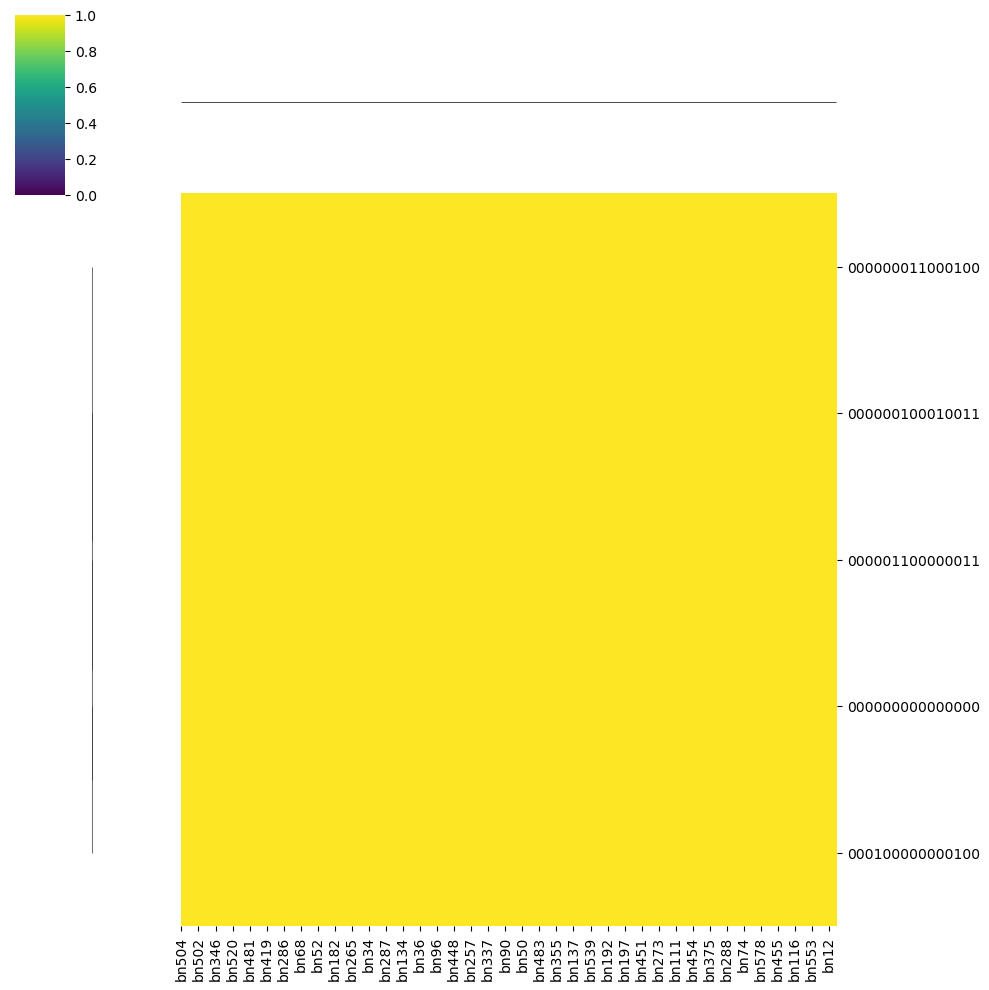

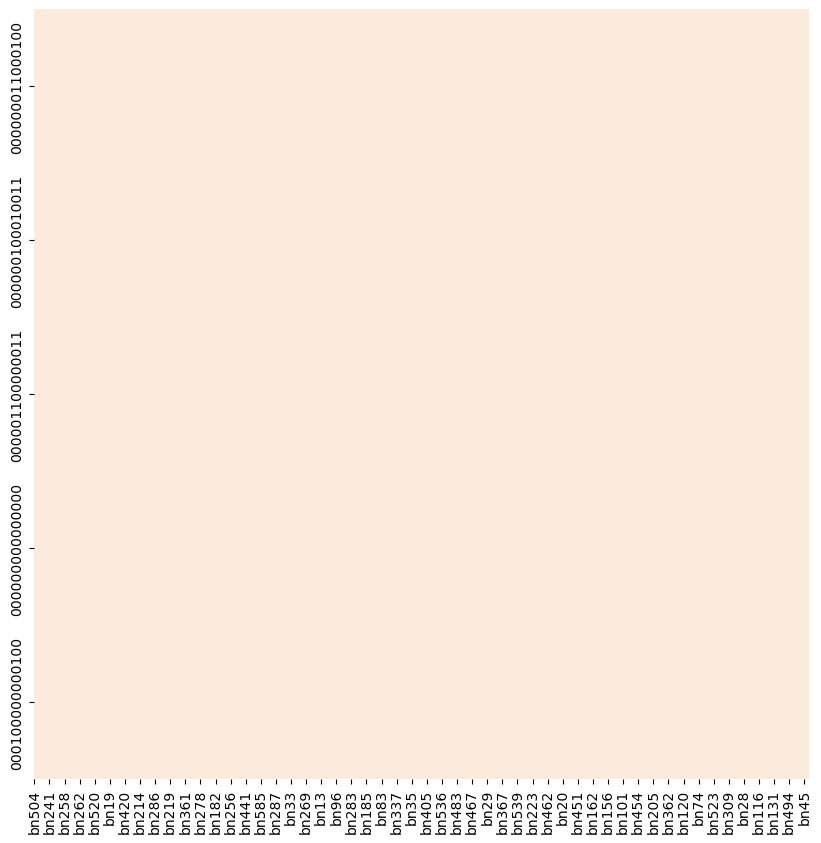

In [6]:
# Create the clustermap
clustermap = sns.clustermap(model.attractor.attractors_df, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.attractor.attractors_df.iloc[row_order, col_order]

# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(reordered_df, 
            #cmap='viridis', 
            vmax=1, vmin=0, cbar=False)
plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/HeraultHematopoiesis_AttractorHeatmap.pdf')
plt.show()
plt.close()

In [7]:
traj_dir = '/home/spankaew/Git/BooleanBenchmark/models/herault_hematopoiesis' 
traj_data = pd.read_csv('/home/spankaew/Git/BooleanBenchmark/models/herault_hematopoiesis_traj_df.csv', index_col= 0)
initial_state = traj_data.loc['iHSC']
initial_state = initial_state.dropna().to_dict()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

In [8]:
model.simulation.update_parameters(max_time = 30,thread_count = 15)
model.simulation.run_simulation(initial_state=initial_state)

Start simulation


100%|██████████| 616/616 [00:52<00:00, 11.78it/s]

Simulation completed


In [9]:
model.simulation.simulation_df

,Myc,Bclaf1,CDK46CycD,Junb,CIPKIP,Gata2,Ikzf1,Spi1,Cebpa,Egr1,Gata1,Klf1,Fli1,Zfpm1,Tal1,model_id,timepoint
0,0.040098,0.638938,0.013671,0.010551,0.001608,0.799803,0.291650,0.003862,0.216142,0.001202,0.366151,0.015433,0.739050,0.415894,0.737054,bn168,0.0
1,0.096684,0.286777,0.059089,0.058680,0.022730,0.463665,0.488115,0.010707,0.229870,0.015305,0.708206,0.078890,0.631643,0.538200,0.669260,bn168,1.0
2,0.080667,0.159343,0.083251,0.087798,0.051279,0.244362,0.378714,0.014064,0.118402,0.025949,0.811569,0.131517,0.670012,0.698558,0.747896,bn168,2.0
3,0.049922,0.098572,0.075516,0.082590,0.073255,0.120434,0.239393,0.013671,0.057391,0.022748,0.837742,0.143665,0.700847,0.782966,0.795237,bn168,3.0
4,0.029793,0.059586,0.049457,0.063855,0.071161,0.059764,0.133193,0.011884,0.031726,0.015318,0.837622,0.138236,0.712162,0.818687,0.818106,bn168,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.898000,0.130000,0.768000,0.898000,0.898000,bn504,24.0
17860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.898000,0.130000,0.768000,0.898000,0.898000,bn504,25.0
17861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.898000,0.130000,0.768000,0.898000,0.898000,bn504,26.0
17862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.898000,0.130000,0.768000,0.898000,0.898000,bn504,27.0


# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

Trajectory object created


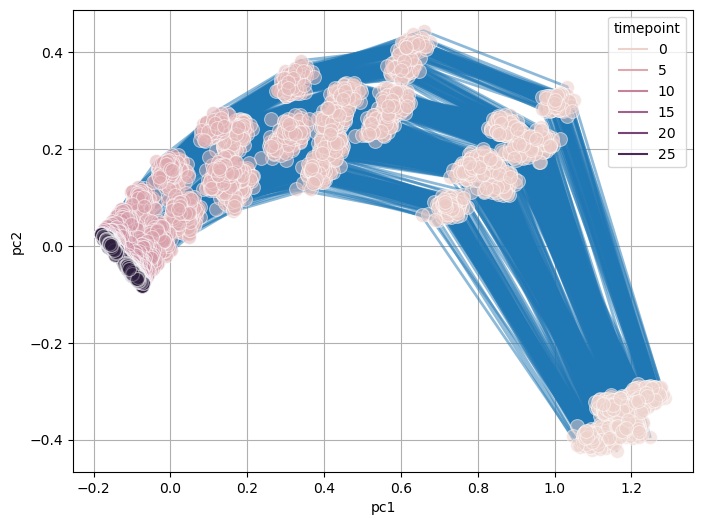

In [10]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean (default)

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [45]:
model.trajectory.calculate_kmean_cluster(n_cluster = 4, metric='euclidean')

Euclidean k-means
0.019 --> 0.011 --> 0.011 --> 0.011 --> 


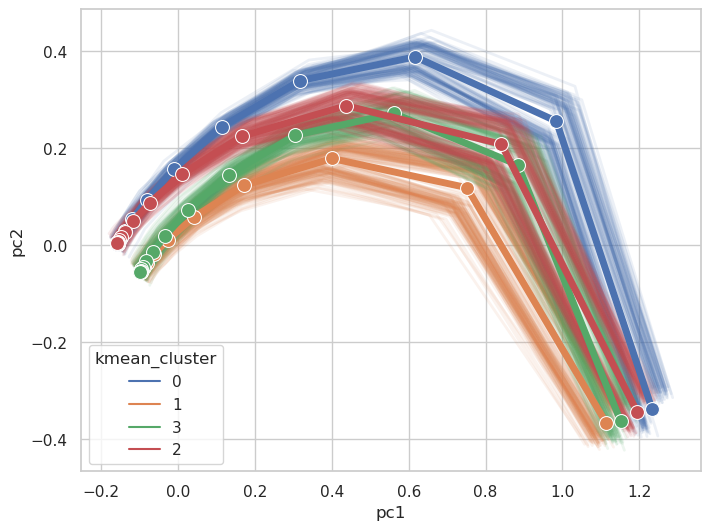

In [46]:
model.trajectory.plot_trajectory_cluster()

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [52]:
model.create_logic()
model.logic.model_logic

Loading models logics


100%|██████████| 616/616 [00:01<00:00, 580.21it/s]


Concatenate results into matrix


100%|██████████| 616/616 [00:02<00:00, 255.47it/s] 


Logic object created


bn168  \
Bclaf1                                                 (Myc)   
CDK46CycD                                     (Bclaf1 & Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1                                (Junb) | (Gata1 & !Klf1)   
Gata1            (Fli1) | (Gata1 & !Ikzf1) | (Gata2 & !Spi1)   
Gata2      (Egr1 & !Gata1 & !Spi1) | (Egr1 & !Zfpm1) | (!...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1                                                (Gata1)   

                                                       bn602  \
Bclaf1                                                 (Myc)   
CDK46CycD                                     (Bclaf1 & Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1       (Gata1 & Junb) | (Gata1 & !Klf1) | (Junb & !Klf1)   
Gata1            (Fli1) | (Gata1 & !Ikzf1) | (Gata2 & !Spi1)   
Gata2      (Egr1 & !Gata1 & !Zfpm1) | (Egr1 & Gata2 & !Sp...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1                                                (Gata1)   

                                                       bn157  \
Bclaf1                                                 (Myc)   
CDK46CycD                                     (Bclaf1 & Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1       (Gata1 & Junb) | (Gata1 & !Klf1) | (Junb & !Klf1)   
Gata1            (Fli1) | (Gata1 & !Ikzf1) | (Gata2 & !Spi1)   
Gata2      (Egr1 & !Zfpm1) | (!Gata1 & Gata2 & !Spi1) | (...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1                                                (Gata1)   

                                                        bn45  \
Bclaf1                                                 (Myc)   
CDK46CycD                                   (Bclaf1) | (Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1                                (Junb) | (Gata1 & !Klf1)   
Gata1      (Fli1) | (Gata1 & !Ikzf1 & !Spi1) | (Gata2 & !...   
Gata2      (Egr1 & !Gata1 & !Spi1 & !Zfpm1) | (!Gata1 & G...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1               

Flatten models logic clauses


100%|██████████| 616/616 [00:00<00:00, 1857434.41it/s]


Concatenate results into matrix


100%|██████████| 616/616 [00:02<00:00, 304.46it/s] 
/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Flattend logic clause created


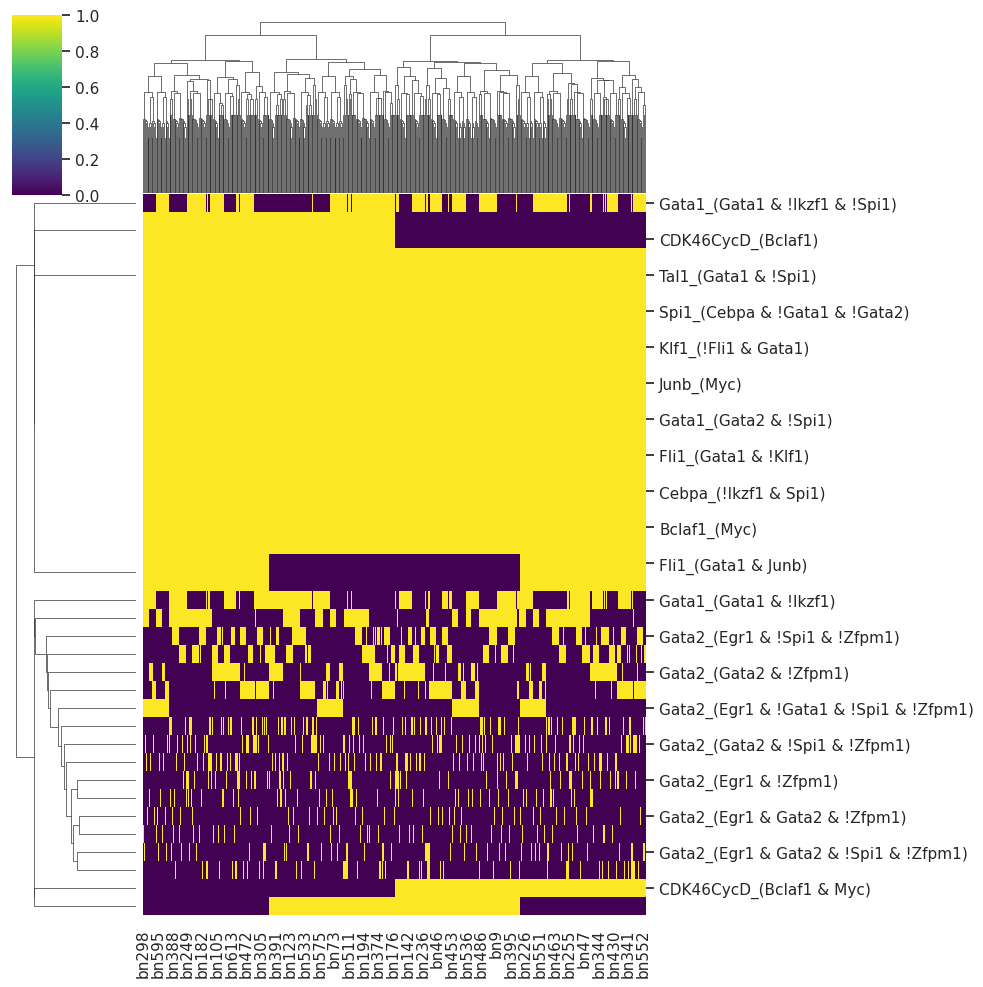

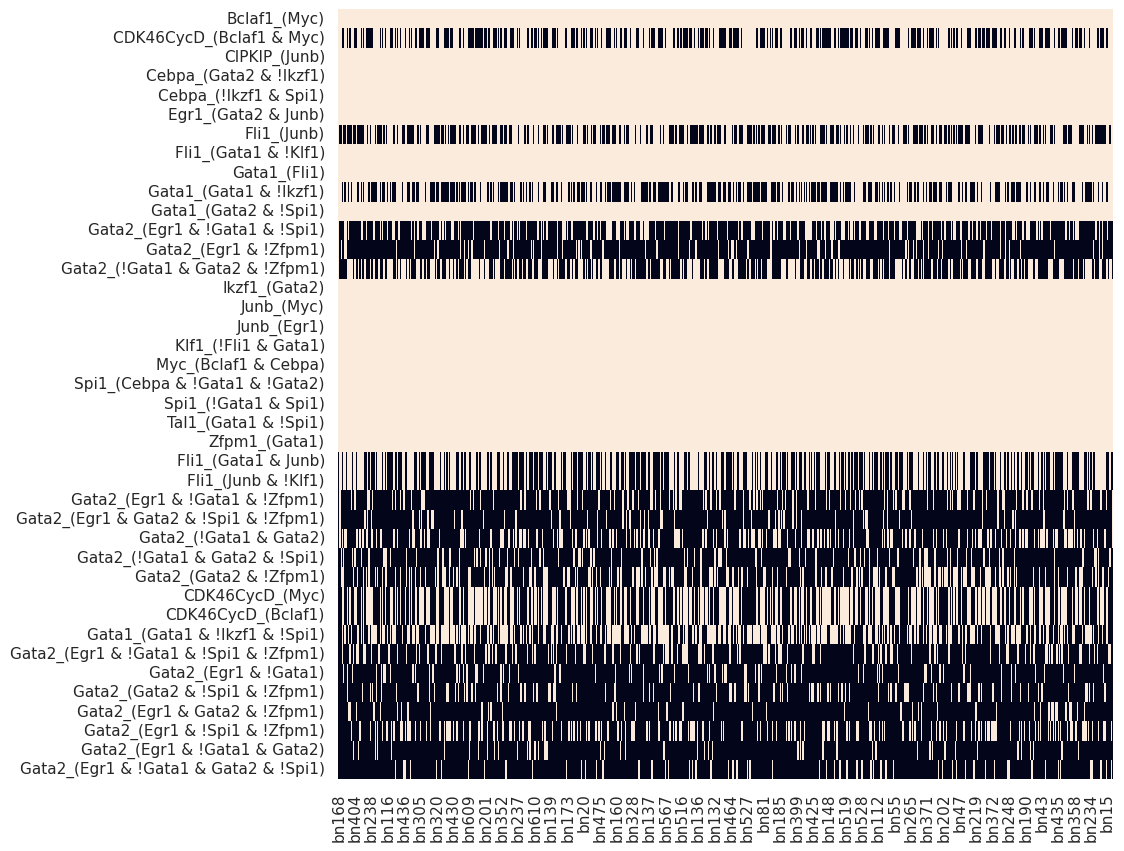

In [53]:
model.logic.create_flattend_logic_clause()
# Create the clustermap
clustermap = sns.clustermap(model.logic.logic_clause_flattend, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.logic.logic_clause_flattend.iloc[row_order, col_order]
# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(model.logic.logic_clause_flattend, vmax=1, vmin=0, cbar=False)
plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/HeraultHematopoiesis_Logic.pdf')
plt.show()
plt.close()

PCA calculated


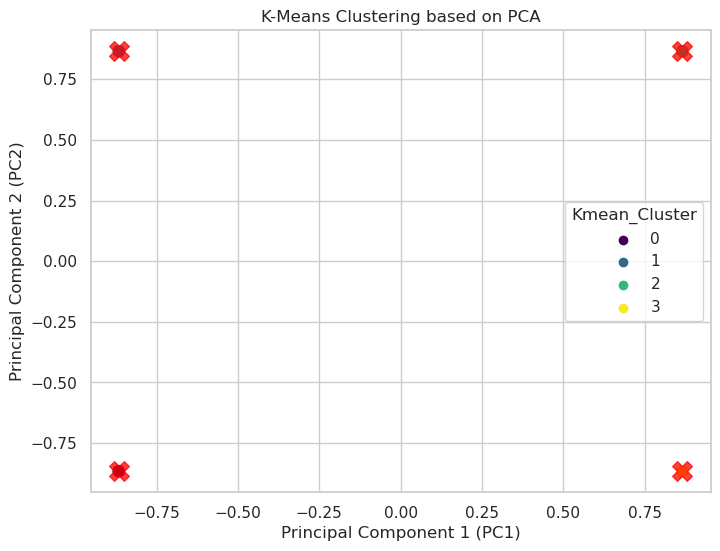

In [54]:
model.logic.calculate_logic_pca()
model.logic.calculate_kmean_cluster(num_cluster=4, plot = True)

bn168    2
bn602    3
bn157    3
bn45     1
bn8      0
        ..
bn15     1
bn200    2
bn356    3
bn364    2
bn504    2
Name: Kmean_Cluster, Length: 616, dtype: int32

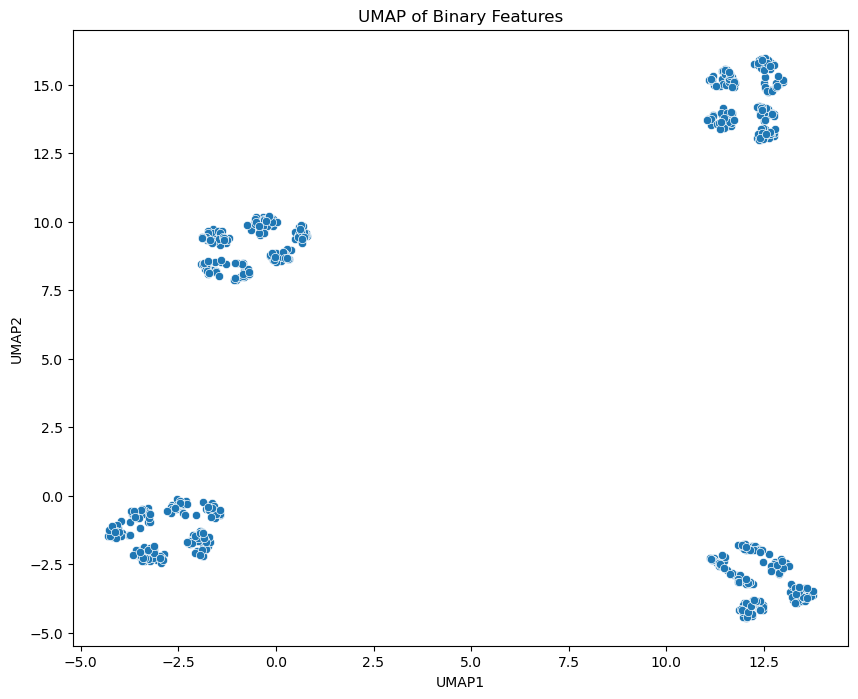

In [13]:
import umap
import matplotlib.pyplot as plt

binary_features = model.logic.logic_clause_flattend.transpose()

# Generate UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(binary_features)

# Convert to DataFrame for easier plotting
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Plot the UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_df)
plt.title('UMAP of Binary Features')
plt.show()

# Test function : calculate the logical function variant for each clusters

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
model_cluster = model.logic.pca_df.Kmean_Cluster
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list(model_cluster.unique()):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list(model_cluster.unique())



# Ordinal encoding
encoder = OrdinalEncoder()
model_logic_t= model_logic.transpose()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 

In [72]:
var_logic_clust

,2,3,1,0
Bclaf1,1,1,1,1
CIPKIP,1,1,1,1
Cebpa,1,1,1,1
Egr1,1,1,1,1
Ikzf1,1,1,1,1
Junb,1,1,1,1
Klf1,1,1,1,1
Myc,1,1,1,1
Spi1,1,1,1,1
Tal1,1,1,1,1


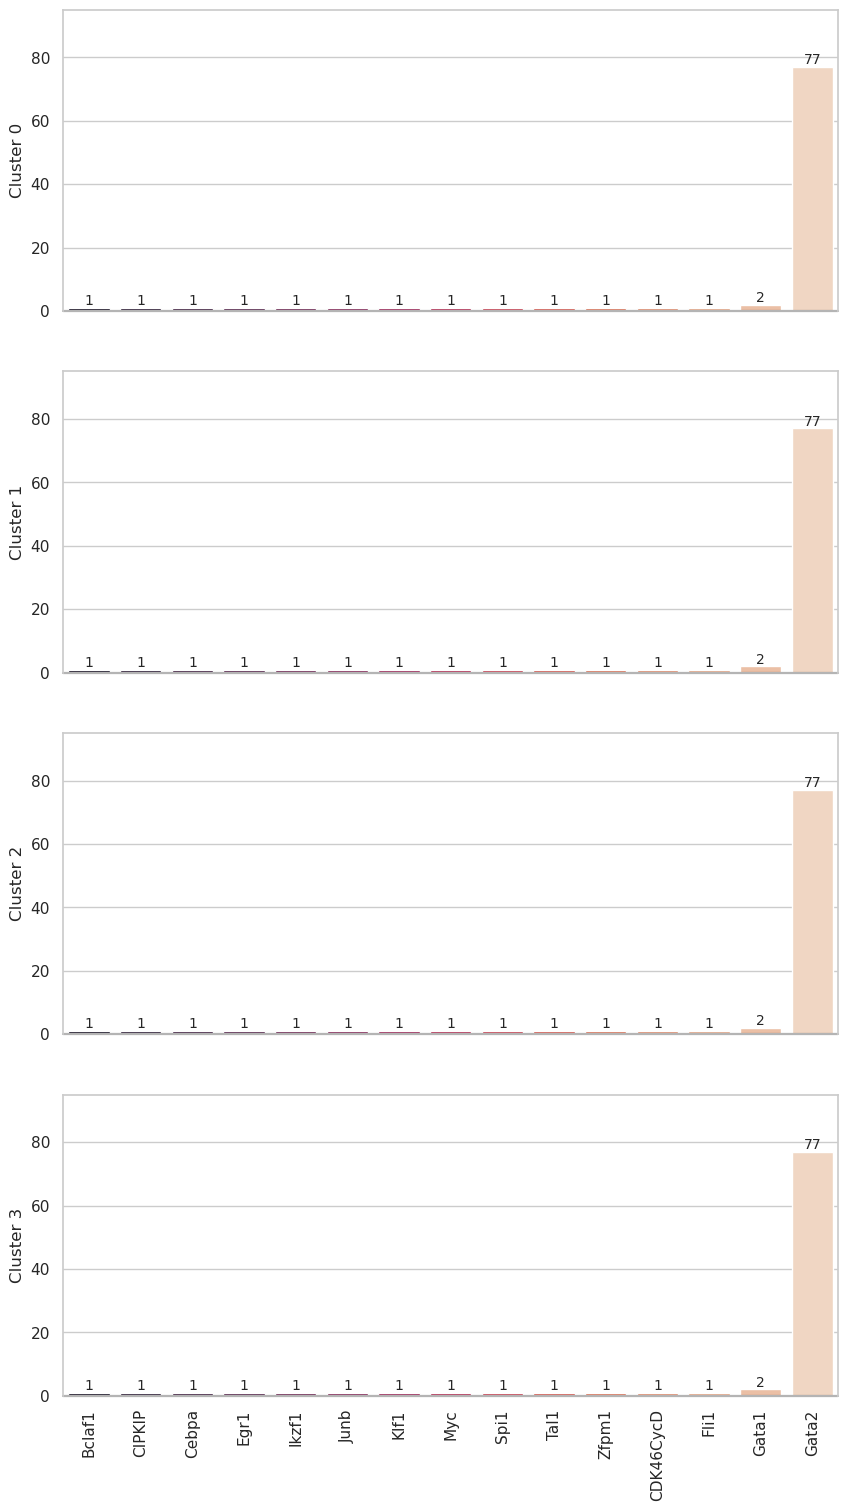

In [73]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(10, 18), sharex=True)
plt.ylim(0, 65)

for i in range(4):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], palette="rocket", ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 95)

plt.xticks(rotation=90)
plt.show()

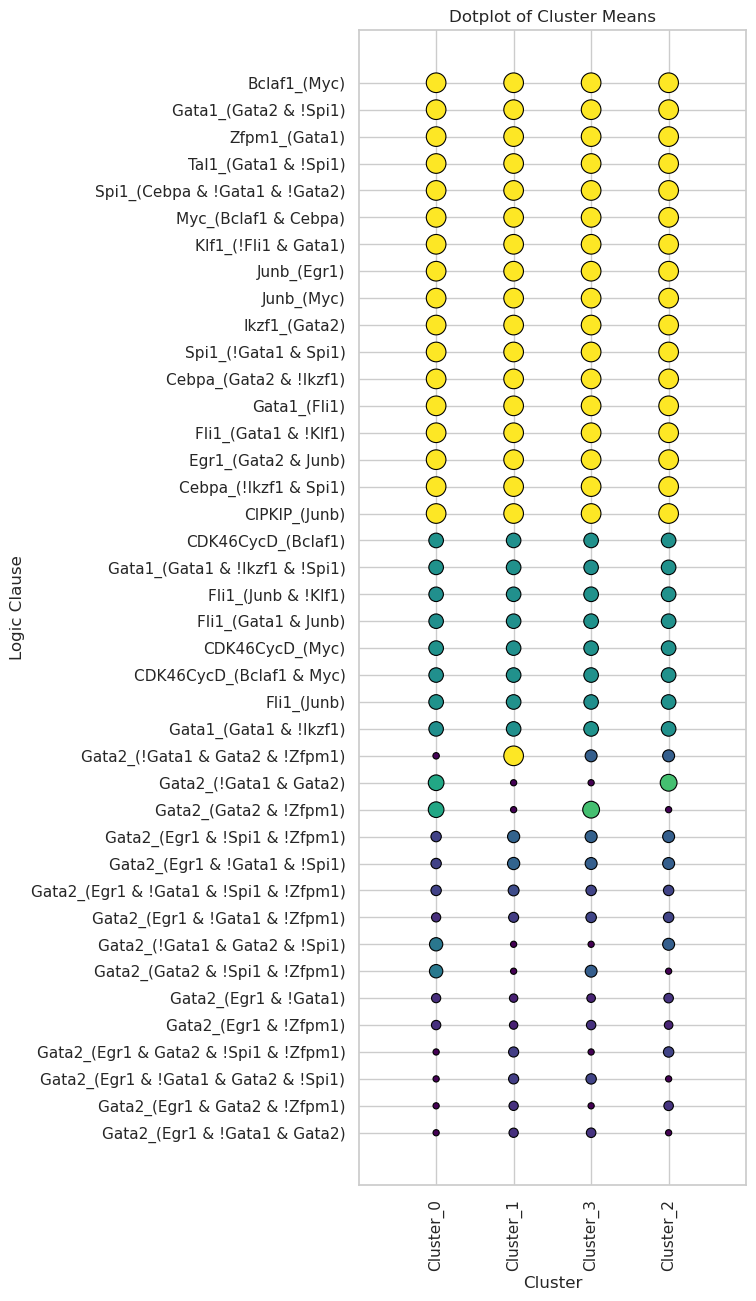

In [74]:
test = model.logic.logic_clause_flattend.copy()
sort_index = list(test.mean(axis = 1).sort_values(ascending = False).index)

result_df = pd.DataFrame()

for cluster in model.trajectory.cluster_dict.values():
    cluster_id = [key for key, value in model.trajectory.cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean

# Convert the result_df to a long format for easier plotting with seaborn
result_df = result_df.loc[sort_index,:]
result_long_df = result_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Value')

# Create the dot plot
plt.figure(figsize=(5, 15))
sns.set_theme(style="whitegrid")
dotplot = sns.scatterplot(data=result_long_df, 
                          x='Cluster', y='index', 
                          size='Value', hue='Value', 
                          palette='viridis', sizes=(20, 200), legend=None,
                          edgecolor = 'black', linewidth = 0.8)

# Customize the plot
plt.title('Dotplot of Cluster Means')
plt.xlabel('Cluster')
plt.ylabel('Logic Clause')
plt.xticks(rotation=90)
plt.xlim(-1,4)
plt.show()


# Test function compare logic function between two clusters

In [76]:
# Get the logic clause matrix
test = model.logic.logic_clause_flattend.copy()

# Get the model name for each cluster
cluster0 = model_cluster.index[model_cluster == 0]
cluster1 = model_cluster.index[model_cluster == 1]

# Calculate the differences between the two clusters
test_dif = test[cluster0].mean(axis = 1) - test[cluster1].mean(axis=1)

# Split the index into two parts
split_index = test_dif.index.str.split('_', expand=True)
split_df = split_index.to_frame(index=False)
split_df['value'] = test_dif.values

# Pivot the DataFrame to create the matrix
matrix = split_df.pivot(index=0, columns= 1, values='value')

# Display the matrix
plot_value = matrix.abs().sum(axis = 1)[sort_index]

plt.figure(figsize=(5, 4))
plot = sns.barplot(x=plot_value.index, y=plot_value.values, palette="rocket")
plot.axhline(0, color="k", clip_on=False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0], fontsize=10)
plt.show()

KeyError: "None of [Index(['Bclaf1_(Myc)', 'Gata1_(Gata2 & !Spi1)', 'Zfpm1_(Gata1)',\n       'Tal1_(Gata1 & !Spi1)', 'Spi1_(Cebpa & !Gata1 & !Gata2)',\n       'Myc_(Bclaf1 & Cebpa)', 'Klf1_(!Fli1 & Gata1)', 'Junb_(Egr1)',\n       'Junb_(Myc)', 'Ikzf1_(Gata2)', 'Spi1_(!Gata1 & Spi1)',\n       'Cebpa_(Gata2 & !Ikzf1)', 'Gata1_(Fli1)', 'Fli1_(Gata1 & !Klf1)',\n       'Egr1_(Gata2 & Junb)', 'Cebpa_(!Ikzf1 & Spi1)', 'CIPKIP_(Junb)',\n       'CDK46CycD_(Bclaf1)', 'Gata1_(Gata1 & !Ikzf1 & !Spi1)',\n       'Fli1_(Junb & !Klf1)', 'Fli1_(Gata1 & Junb)', 'CDK46CycD_(Myc)',\n       'CDK46CycD_(Bclaf1 & Myc)', 'Fli1_(Junb)', 'Gata1_(Gata1 & !Ikzf1)',\n       'Gata2_(!Gata1 & Gata2 & !Zfpm1)', 'Gata2_(!Gata1 & Gata2)',\n       'Gata2_(Gata2 & !Zfpm1)', 'Gata2_(Egr1 & !Spi1 & !Zfpm1)',\n       'Gata2_(Egr1 & !Gata1 & !Spi1)',\n       'Gata2_(Egr1 & !Gata1 & !Spi1 & !Zfpm1)',\n       'Gata2_(Egr1 & !Gata1 & !Zfpm1)', 'Gata2_(!Gata1 & Gata2 & !Spi1)',\n       'Gata2_(Gata2 & !Spi1 & !Zfpm1)', 'Gata2_(Egr1 & !Gata1)',\n       'Gata2_(Egr1 & !Zfpm1)', 'Gata2_(Egr1 & Gata2 & !Spi1 & !Zfpm1)',\n       'Gata2_(Egr1 & !Gata1 & Gata2 & !Spi1)',\n       'Gata2_(Egr1 & Gata2 & !Zfpm1)', 'Gata2_(Egr1 & !Gata1 & Gata2)'],\n      dtype='object', name=0)] are in the [index]"

In [77]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal encoding

encoder = OrdinalEncoder()
model_logic = model.logic.model_logic
model_logic_t= model_logic.transpose()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)
sort_index = encoded_df.max().sort_values().index

bn0      0
bn1      0
bn10     0
bn100    1
bn101    0
        ..
bn95     0
bn96     1
bn97     2
bn98     2
bn99     2
Length: 616, dtype: int64

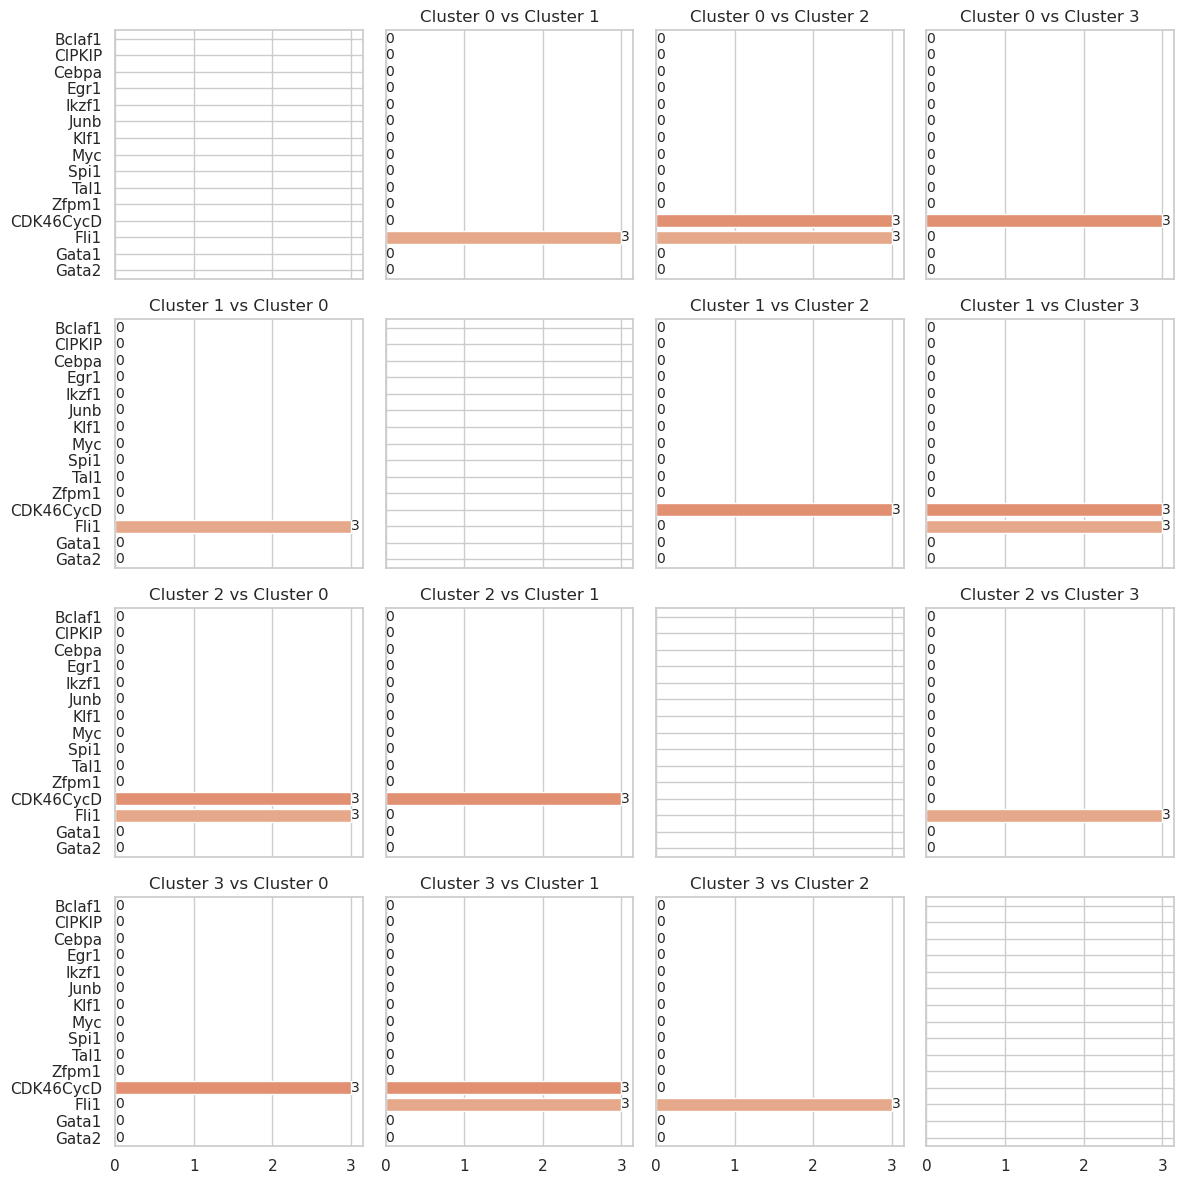

In [78]:
# Assuming model.logic.logic_clause_flattend and model_cluster are already defined
test = model.logic.logic_clause_flattend.copy()
unique_clusters = [0,1,2,3,]

# Create a grid of subplots
num_clusters = len(unique_clusters)
fig, axes = plt.subplots(num_clusters, num_clusters, figsize=(12, 12), sharex=True, sharey=True)

# Loop through each pair of clusters
for i, cluster_i in enumerate(unique_clusters):
    for j, cluster_j in enumerate(unique_clusters):
        if i != j:
            # Get the model names for each cluster
            cluster_i_indices = model_cluster.index[model_cluster == cluster_i]
            cluster_j_indices = model_cluster.index[model_cluster == cluster_j]

            # Calculate the differences between the two clusters
            test_dif = test[cluster_i_indices].mean(axis=1) - test[cluster_j_indices].mean(axis=1)

            # Split the index into two parts
            split_index = test_dif.index.str.split('_', expand=True)
            split_df = split_index.to_frame(index=False)
            split_df['value'] = test_dif.values

            # Pivot the DataFrame to create the matrix
            matrix = split_df.pivot(index=0, columns=1, values='value')

            # Display the matrix
            plot_value = matrix.abs().sum(axis=1)[sort_index]

            # Plot the differences in the corresponding subplot
            ax = axes[i, j]
            sns.barplot(x=plot_value.values, y=plot_value.index, palette="rocket", ax=ax)
            #ax.axhline(0, color="k", clip_on=False)
            #ax.set_xlabel(None)
            #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            ax.bar_label(ax.containers[0], fontsize=10)
            ax.set_title(f'Cluster {cluster_i} vs Cluster {cluster_j}')

# Adjust layout
plt.tight_layout()
plt.show()

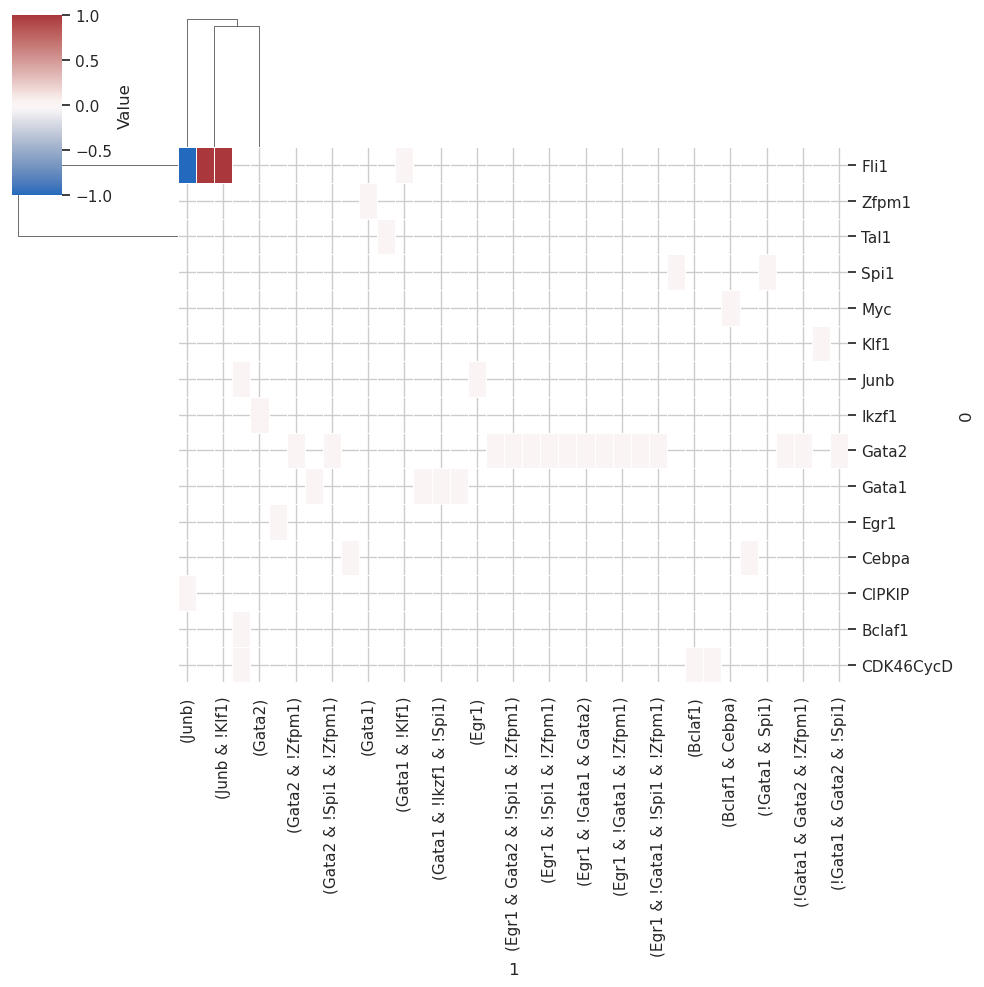

In [79]:
sns.clustermap(matrix.fillna(0), cmap='vlag', vmax=1, vmin=-1, mask=matrix.isna(), cbar_kws={'label': 'Value'}, figsize=(10, 10), linewidth = .5)

# Set the color for NaN values to grey
for text in plt.gcf().texts:
    if text.get_text() == 'NaN':
        text.set_color('grey')

In [80]:
model_mtx = model.simulation.simulation_df
cluster_dict = model.logic.pca_df.Kmean_Cluster.to_dict()
model_mtx['kmean_cluster'] = model_mtx['model_id']
model_mtx['kmean_cluster'] = model_mtx['kmean_cluster'].replace(cluster_dict)

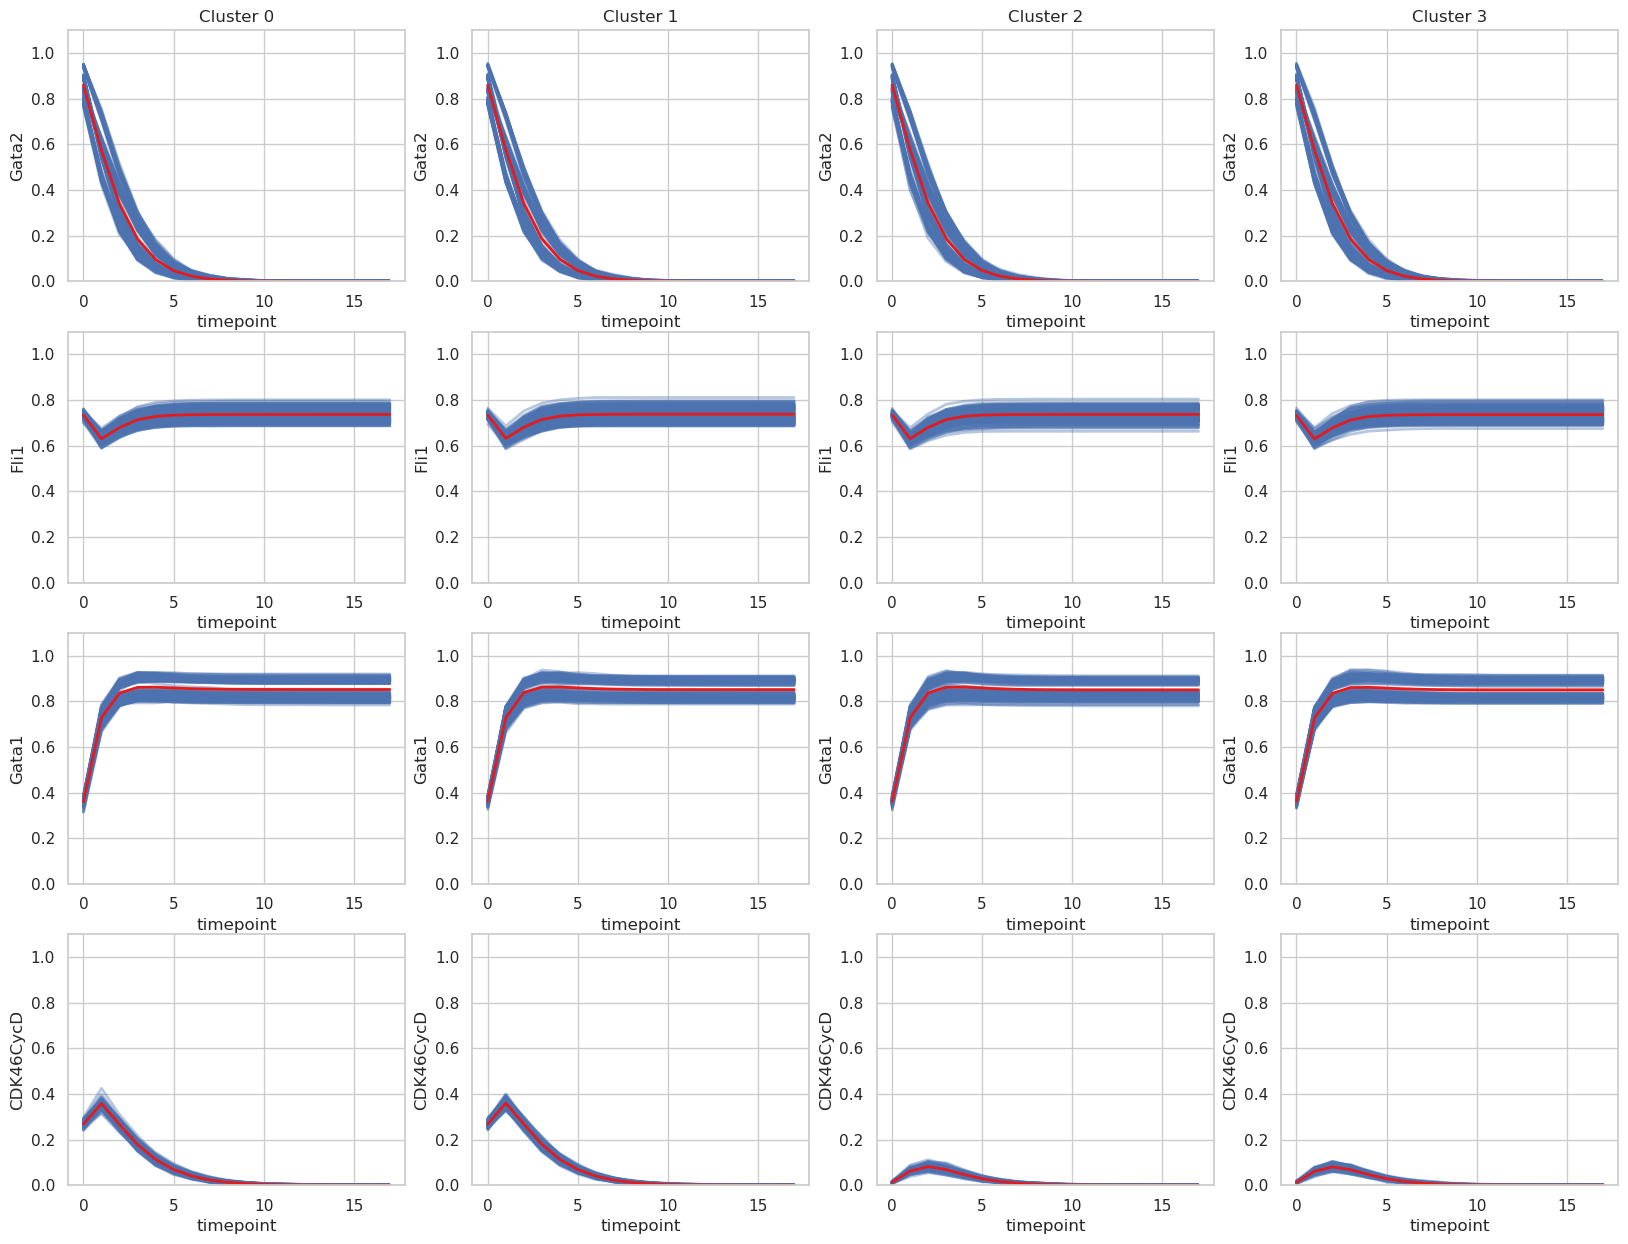

In [81]:

# Setup the gene list
selected_genes = ['Gata2','Fli1','Gata1','CDK46CycD']
num_timesteps = 18

# Function to create matrix for each condition
def create_vis_matrix(cluster_num):
    vis = model_mtx.loc[model_mtx['kmean_cluster'] == cluster_num]
    vis = vis[selected_genes + ['timepoint', 'model_id']]
    vis = vis[vis.timepoint.isin(range(0, num_timesteps))]
    vis['cluster'] = str(cluster_num)
    return vis

# Create matrices for each condition
vis_matrices = [create_vis_matrix(i) for i in range(4)]

# Plot with Seaborn
plt.figure(figsize=(20, 15))
n_genes = len(selected_genes)

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, 4, 4 * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue='cluster', units = 'model_id', estimator = None, alpha = 0.4)
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.legend().remove()
        if i == 0:
            plot.set_title(f'Cluster {j}')

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, 4,4 * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue='cluster', palette='Set1')
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.legend().remove()
        if i == 0:
            plot.set_title(f'Cluster {j}')

#plt.tight_layout()
plt.show()
plt.close()

In [5]:
import numpy as np
from tqdm import tqdm

logic_clause = model.logic.logic_clause_flattend
logic_diff = pd.DataFrame()

for i in tqdm(list(logic_clause.columns)):
    test1 = logic_clause[i]
    row_sum = []
    for j in list(logic_clause.columns):
        test2 = logic_clause[j]
        test_dif = test1 - test2
        test_dif = np.abs(test_dif).sum()
        row_sum = row_sum + [test_dif]
    row_sum_df = pd.DataFrame([row_sum], columns=logic_clause.columns)  # Convert list to DataFrame
    logic_diff = pd.concat([logic_diff, row_sum_df])

logic_diff.columns = logic_clause.columns
logic_diff.index = logic_clause.columns

100%|██████████| 617/617 [01:06<00:00,  9.27it/s]


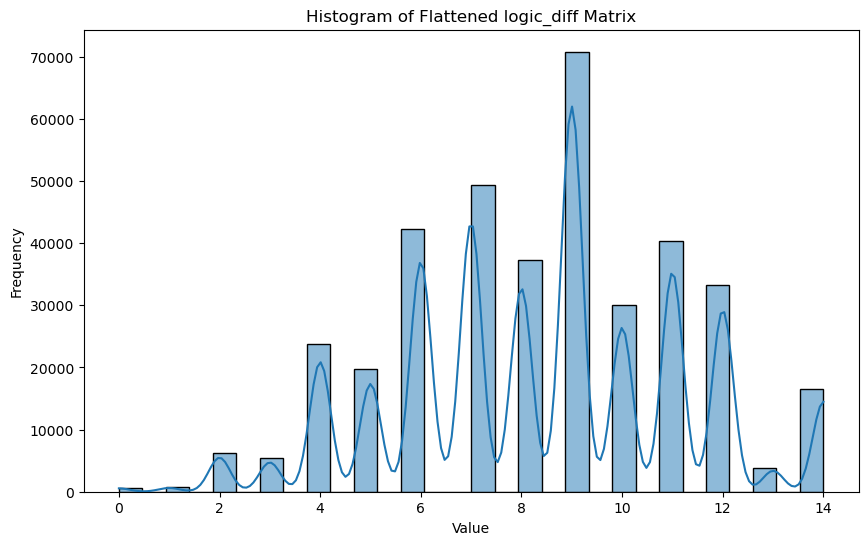

In [7]:
import matplotlib.pyplot as plt
# Flatten the matrix to a 1D array
flattened_array = logic_diff.values.flatten()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(flattened_array, bins=30, kde=True)
plt.title('Histogram of Flattened logic_diff Matrix')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
model_logic_mtx = 

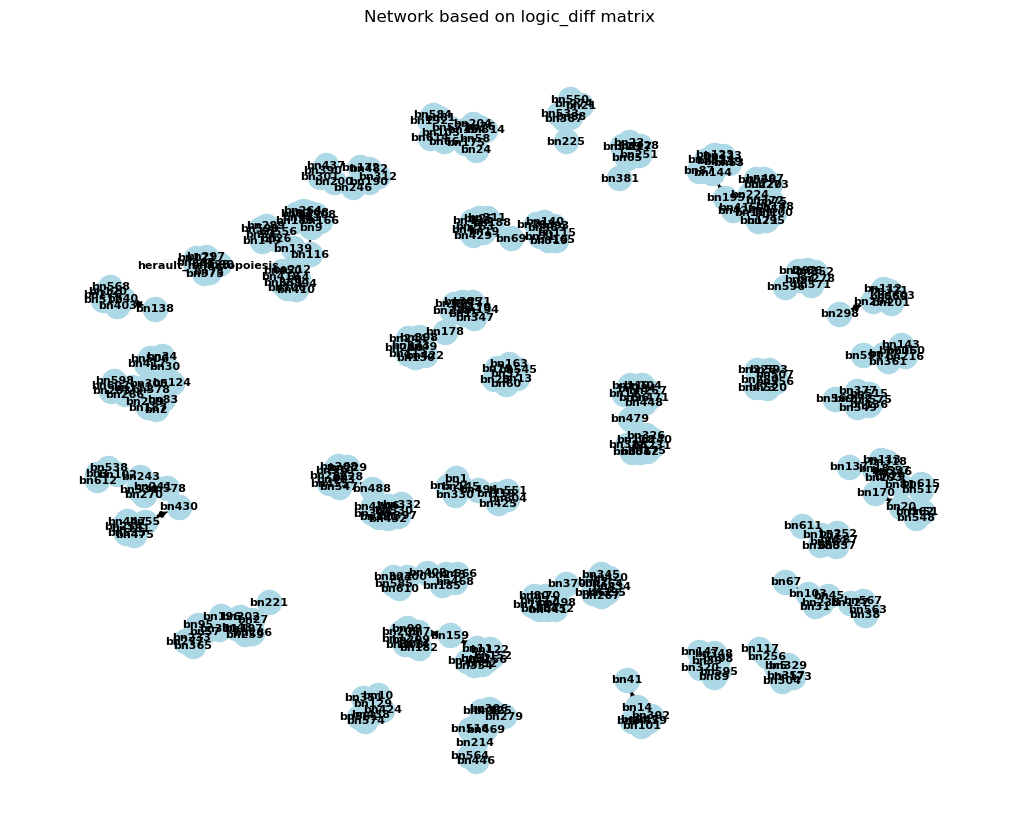

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample logic_diff matrix
data = {
    'A': [0, 1, 2],
    'B': [1, 0, 3],
    'C': [2, 3, 0]
}
#logic_diff = pd.DataFrame(data, index=['A', 'B', 'C'])

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for source in logic_diff.index:
    for target in logic_diff.columns:
        if logic_diff.loc[source, target] == 1:  # Assuming 0 means no edge
            G.add_edge(source, target, weight=logic_diff.loc[source, target])

# Draw the network
pos = nx.spring_layout(G)  # Position nodes using the default spring layout with no weight

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)
nx.draw_networkx_edges(G, pos, alpha=0.1)  # Set edge transparency to 0.1

plt.title('Network based on logic_diff matrix')
plt.show()

In [11]:
import numpy as np

model.trajectory.cluster_dict
model_cluster = pd.Series(model.trajectory.cluster_dict)

logic_clause = model.logic.logic_clause_flattend
logic_diff = pd.DataFrame()

for i in model_cluster.unique():
    test1 = logic_clause[model_cluster.index[model_cluster == i]].mean(axis = 1)
    row_sum = []
    for j in model_cluster.unique():
        test2 = logic_clause[model_cluster.index[model_cluster == j]].mean(axis = 1)
        test_dif = test1 - test2
        test_dif = np.abs(test_dif).sum()
        row_sum = row_sum + [test_dif]
    row_sum_df = pd.DataFrame([row_sum])  # Convert list to DataFrame
    logic_diff = pd.concat([logic_diff, row_sum_df])

logic_diff.columns = list(model_cluster.unique().astype('str'))
logic_diff.index = list(model_cluster.unique().astype('str'))

In [16]:
G.edges(data=True)

OutEdgeDataView([('0', '4', {'weight': 3.0}), ('0', '2', {'weight': 5.516479400749064}), ('0', '3', {'weight': 3.6735849056603773}), ('0', '1', {'weight': 3.6666666666666665}), ('4', '0', {'weight': 3.0}), ('4', '2', {'weight': 5.516479400749064}), ('4', '3', {'weight': 3.692452830188679}), ('4', '1', {'weight': 3.6666666666666665}), ('2', '0', {'weight': 5.516479400749064}), ('2', '4', {'weight': 5.516479400749064}), ('2', '3', {'weight': 2.2239417708995832}), ('2', '1', {'weight': 2.2056179775280897}), ('3', '0', {'weight': 3.6735849056603773}), ('3', '4', {'weight': 3.692452830188679}), ('3', '2', {'weight': 2.2239417708995832}), ('3', '1', {'weight': 2.8383647798742135}), ('1', '0', {'weight': 3.6666666666666665}), ('1', '4', {'weight': 3.6666666666666665}), ('1', '2', {'weight': 2.2056179775280897}), ('1', '3', {'weight': 2.8383647798742135})])

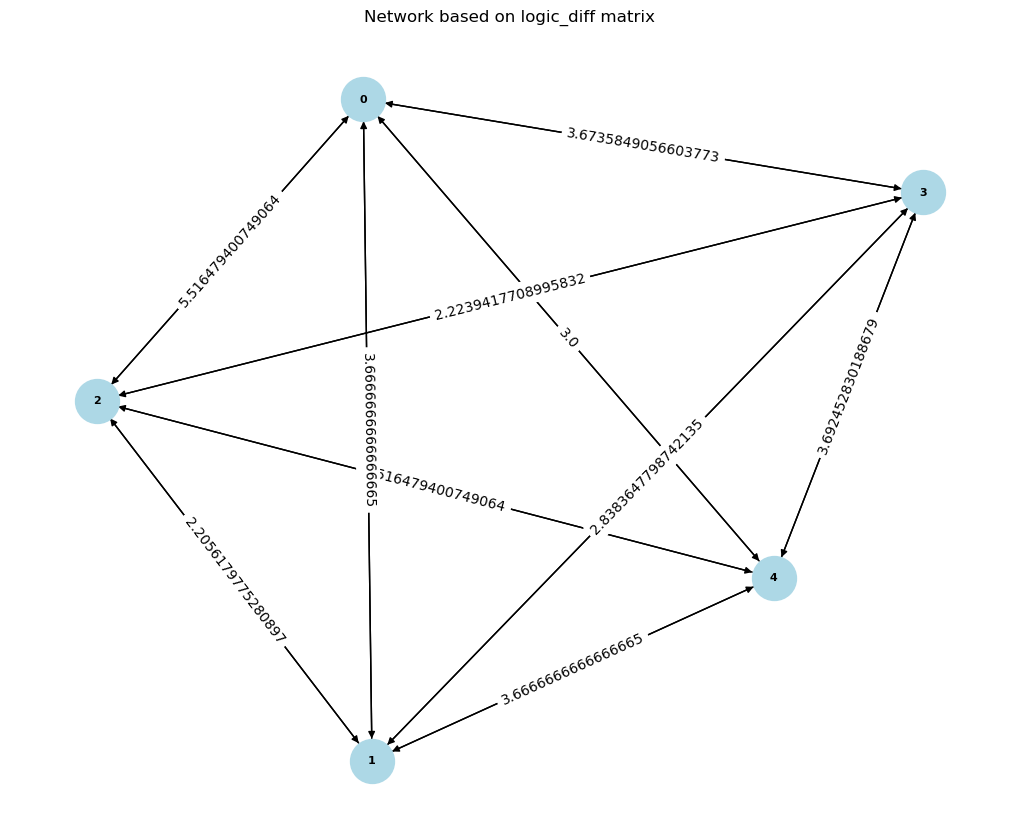

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample logic_diff matrix
data = {
    'A': [0, 1, 2],
    'B': [1, 0, 3],
    'C': [2, 3, 0]
}
#logic_diff = pd.DataFrame(data, index=['A', 'B', 'C'])

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for source in logic_diff.index:
    for target in logic_diff.columns:
        if logic_diff.loc[source, target] > 0 :  # Assuming 0 means no edge
            G.add_edge(source, target, weight=logic_diff.loc[source, target])

# Draw the network
pos = nx.spring_layout(G, weight='weight',)  # Position nodes using the spring layout with weight



plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)
nx.draw_networkx_edges(G, pos, alpha=0.1)  # Set edge transparency to 0.1

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title('Network based on logic_diff matrix')
plt.show()

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


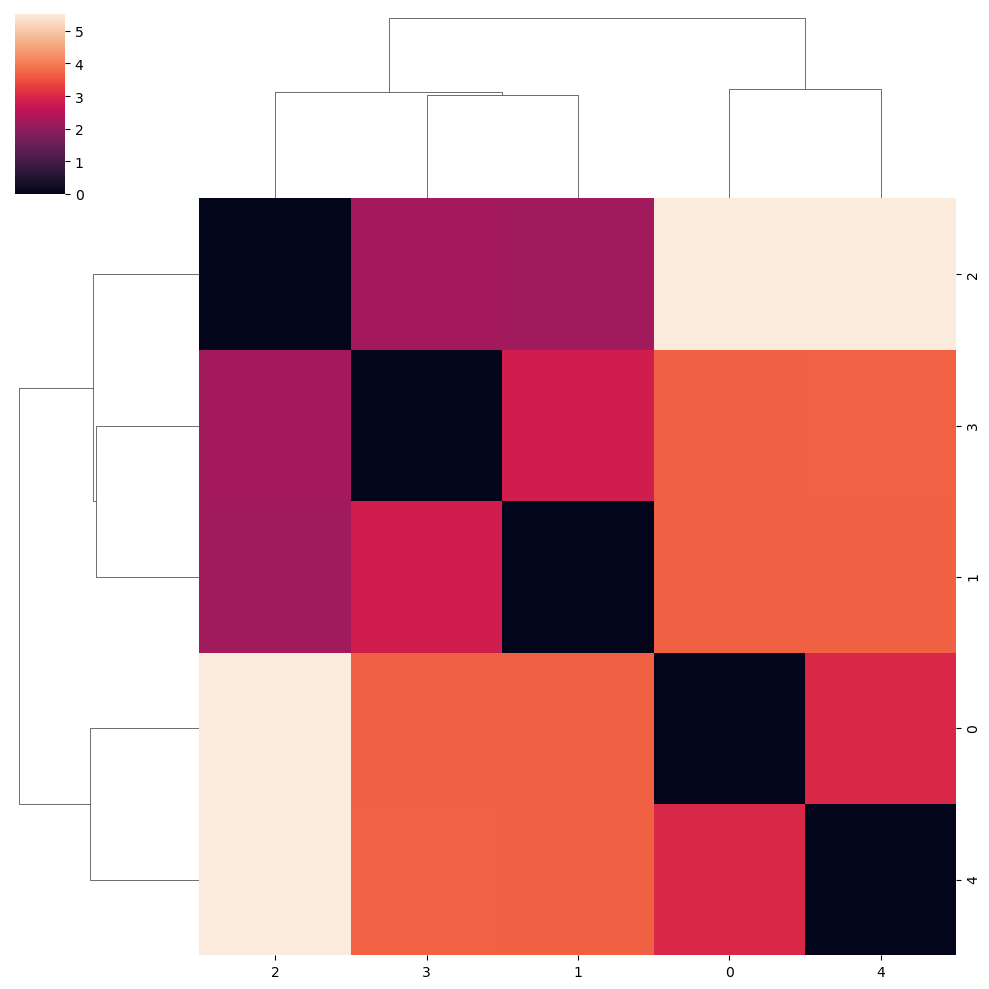

In [14]:
sns.clustermap(logic_diff)